<a href="https://colab.research.google.com/github/ShunyaoMao/fastai/blob/main/Club_logos_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
key = os.environ.get('AZURE_SEARCH_KEY','7e94a5f29aaa494cacefe5a18acb8b20')

In [ ]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [ ]:
results = search_images_bing(key, 'Liverpool logos')
ims = results.attrgot('content_url')
len(ims)

141

In [ ]:
club_types = 'liverpool logos','manchester united logos','chelsea logos','tottenham logos','arsenal logos'
path = Path('clubs')

In [ ]:
if not path.exists():
    path.mkdir()
    for o in club_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} club')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
print(path)

clubs


In [ ]:
fns = get_image_files(path)
fns

(#565) [Path('clubs/chelsea logos/35c1b63c-2659-432f-9a63-9e69792bbbf5.jpg'),Path('clubs/chelsea logos/641abc6d-778b-41e7-9877-48e9b543234a.png'),Path('clubs/chelsea logos/4d1b053c-5f93-4634-8f1d-d90e2c920afd.jpg'),Path('clubs/chelsea logos/5effccf3-c9b9-46f0-a24b-a22e1705e6c6.jpg'),Path('clubs/chelsea logos/cce52cb3-40ee-4cd0-ac78-a91b6af9049a.jpg'),Path('clubs/chelsea logos/08ab36bb-fba0-450e-b0e0-34abd1f7a815.jpeg'),Path('clubs/chelsea logos/88a90f23-4b93-4ecb-8375-f6aaaabf23d8.jpg'),Path('clubs/chelsea logos/4c3d29d4-7d71-42b6-97d5-b06b9a776da3.jpg'),Path('clubs/chelsea logos/123d9c0b-afa6-4f47-93f5-2495c9009a67.jpg'),Path('clubs/chelsea logos/93424088-db82-4f17-a9e0-2bc99f4c9ba4.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#12) [Path('clubs/chelsea logos/eefe2a28-3ba6-4e6c-8098-d0cb6c95312c.jpg'),Path('clubs/tottenham logos/0db05df3-772e-4e93-8066-eec963e0c7fd.jpg'),Path('clubs/tottenham logos/80108862-07a2-47e0-9f09-9f9e85ebd378.jpg'),Path('clubs/manchester united logos/82749c60-cd33-4fd6-b7ee-44a0fe307da4.jpg'),Path('clubs/manchester united logos/7a8d2068-0403-4943-b738-e52ce77c7cec.jpg'),Path('clubs/manchester united logos/ee503fe3-1b25-4a81-8fe6-7e59874b7df6.jpg'),Path('clubs/manchester united logos/6d7536bf-4ee2-4819-b650-d3f85489259d.jpg'),Path('clubs/manchester united logos/4de9e335-d9d7-4417-b1f4-8428ffdb1c85.jpg'),Path('clubs/manchester united logos/6609ce15-c617-452c-b339-e114b49bf0ba.jpg'),Path('clubs/liverpool logos/20846d15-8caf-4480-b729-28315ce4d8a8.svg')...]

In [ ]:
failed.map(Path.unlink);

In [ ]:
clubs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = clubs.dataloaders(path)

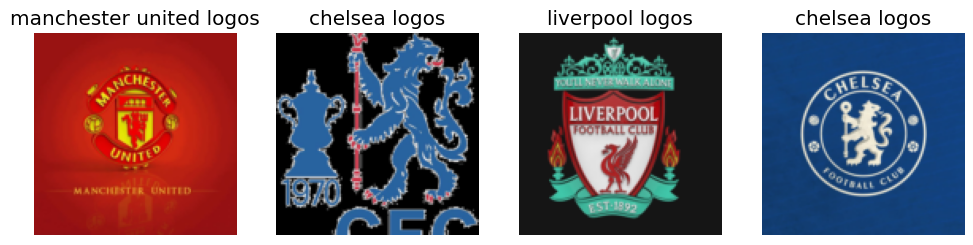

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

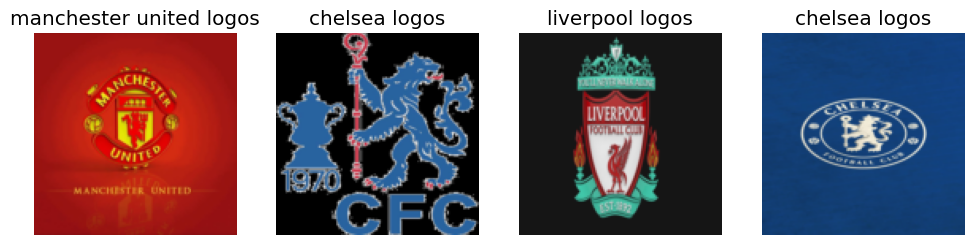

In [ ]:
clubs = clubs.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = clubs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


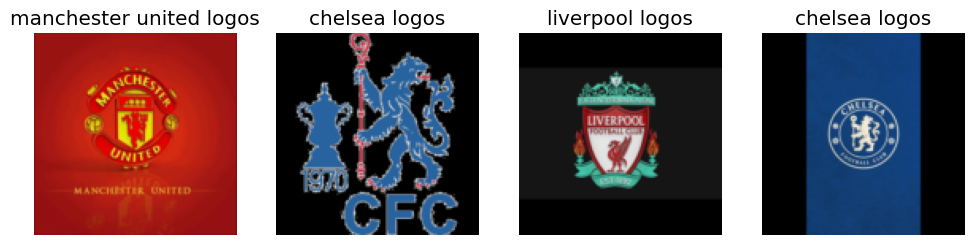

In [ ]:
clubs = clubs.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = clubs.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

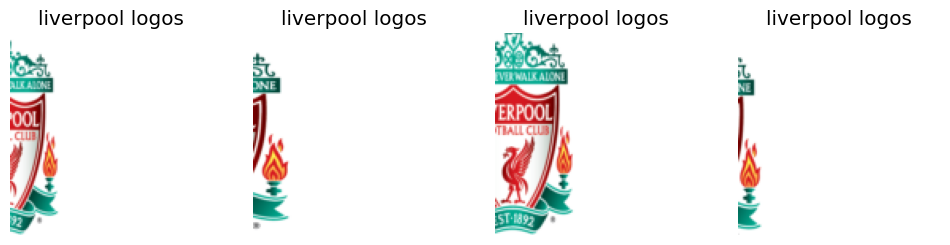

In [ ]:
clubs = clubs.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = clubs.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

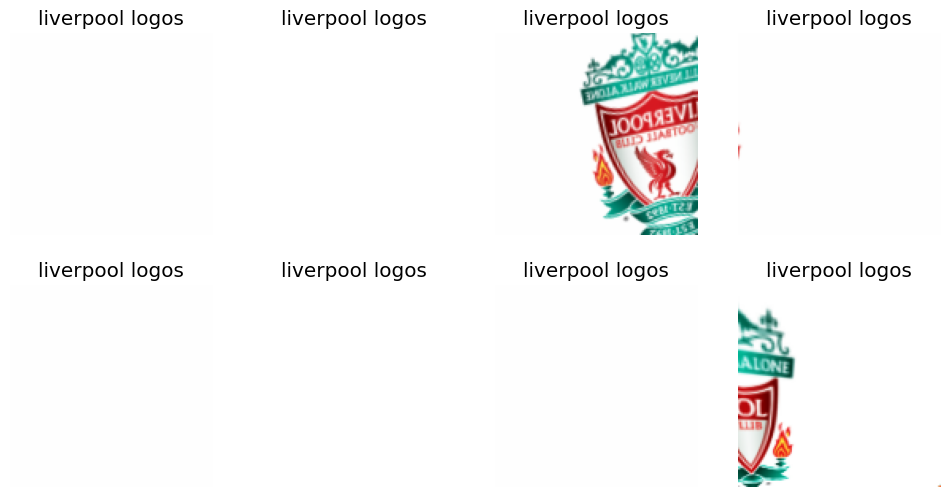

In [ ]:
clubs = clubs.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = clubs.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
clubs = clubs.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = clubs.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 102MB/s]


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in by

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


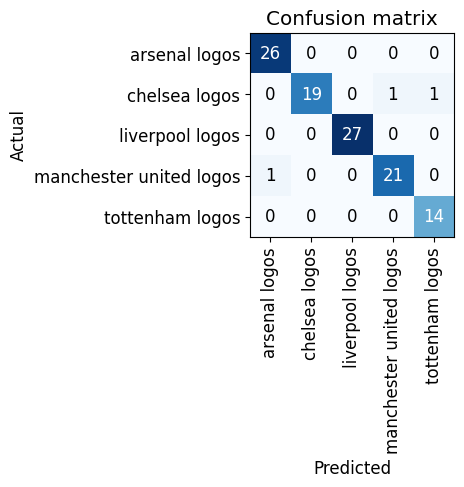

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

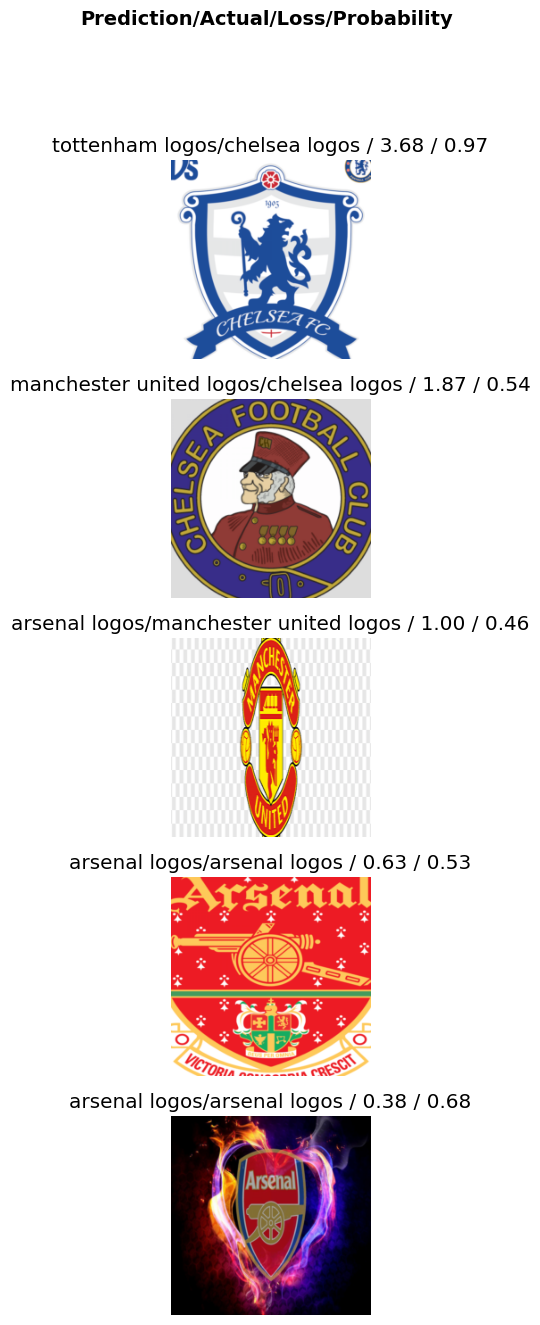

In [ ]:
interp.plot_top_losses(5, nrows=5)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.dls.vocab

['arsenal logos', 'chelsea logos', 'liverpool logos', 'manchester united logos', 'tottenham logos']

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [ ]:
#hide_output
VBox([widgets.Label('Select your Club!'),
      btn_upload, btn_run, out_pl, lbl_pred])